# 电力负荷数据处理

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.pylab import mpl 
mpl.rcParams['font.sans-serif'] = ['SimHei']   #显示中文
mpl.rcParams['axes.unicode_minus']=False       #显示负号
%matplotlib inline

## 1. 合并连个时期的数据

In [4]:
# 读取两个时期的数据
houseid = 1
if houseid < 13:
    file_name = 'RAW_House{}_Part'.format(houseid) # < 13
else:
    file_name = 'RAW_House_{}_Part'.format(houseid) # >= 13
df_h1_p2 = pd.read_csv('REFIT_source/' + file_name + '2.csv',parse_dates =["Time"], index_col ="Time")
df_h1_p1 = pd.read_csv('REFIT_source/' + file_name + '1.csv',parse_dates =["Time"], index_col ="Time")

In [5]:
# 连接两个时期的数据
df_h1 = pd.concat([df_h1_p1, df_h1_p2], axis=0, join="outer") #按照时间连接两个时期的数据, 以时间为基准, 并集
df_h1 = df_h1.sort_index() #连接后按照时间进行升序排序
# print(len(df_h1))
# plt.figure(figsize=(20,10))
# df_h1["Aggregate"].plot()
# plt.show()

In [6]:
print("总共有{:,d}条".format(len(df_h1["Aggregate"])))
print("有{:,d}条存在空值".format(len(df_h1)-len(df_h1.dropna()))) # 统计nan值

总共有8,518,763条
有2,425,207条存在空值


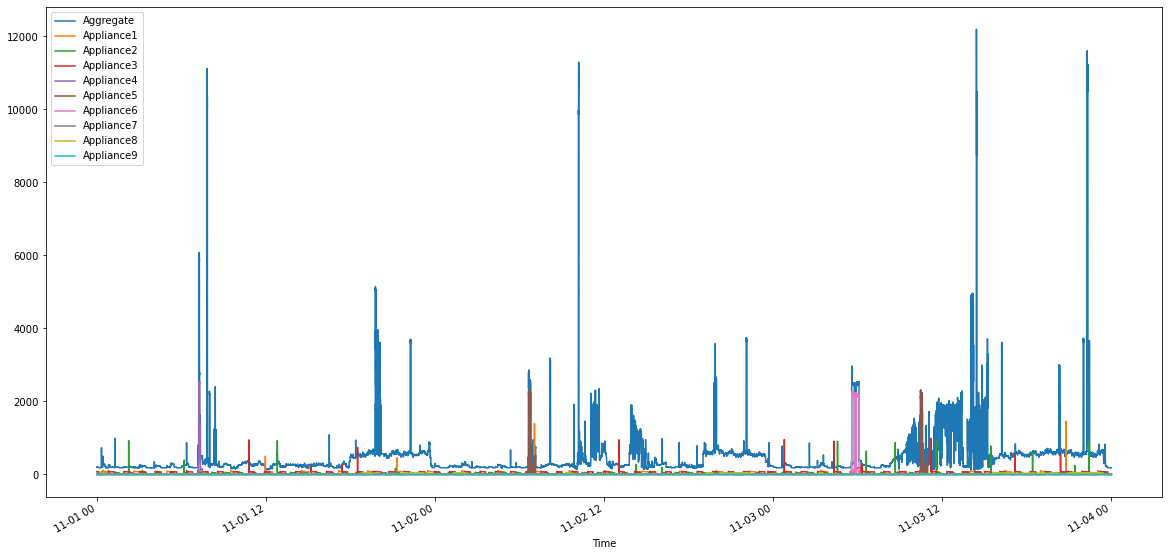

In [22]:
df_h1.drop(columns=["Unix"])["2013-11-01":"2013-11-03"].plot(figsize=(20,10))
plt.legend()
plt.show()

In [4]:
df_h1.describe()

,Unix,Aggregate,Appliance1,Appliance2,Appliance3,Appliance4,Appliance5,Appliance6,Appliance7,Appliance8,Appliance9
count,8.518763e+06,8.329790e+06,8.080873e+06,8.059295e+06,8.206802e+06,8.007800e+06,8.021540e+06,8.176426e+06,8.286011e+06,8.128058e+06,6.606952e+06
mean,1.408317e+09,4.665303e+02,1.924960e+01,1.721273e+01,2.961524e+01,5.259041e+00,1.082825e+01,1.107281e+01,2.891981e+00,6.386319e+00,7.732328e+01
std,1.471410e+07,8.007238e+02,1.766970e+02,9.308420e+01,7.645196e+01,3.997122e+02,1.584394e+02,1.580243e+02,1.361159e+02,1.264499e+02,2.763483e+02
min,1.381328e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.397942e+09,1.850000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,1.407965e+09,2.380000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.419772e+09,4.110000e+02,0.000000e+00,4.500000e+01,7.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,1.436529e+09,2.915900e+04,7.667700e+04,9.830100e+04,7.372500e+04,9.830100e+04,7.372500e+04,3.761000e+04,9.829900e+04,9.830100e+04,6.553500e+04


## 2. 对数据进行处理：


### 2.1 重采样

In [46]:
# 下采样
df_resample = df_h1.resample('1T').mean() #默认忽略NaN值
df_resample = df_resample.drop(labels='Unix',axis=1) #去除时间戳，因为包含空值影响后面的数据补全
len(df_resample)-len(df_resample.dropna()) # 统计nan值

218144

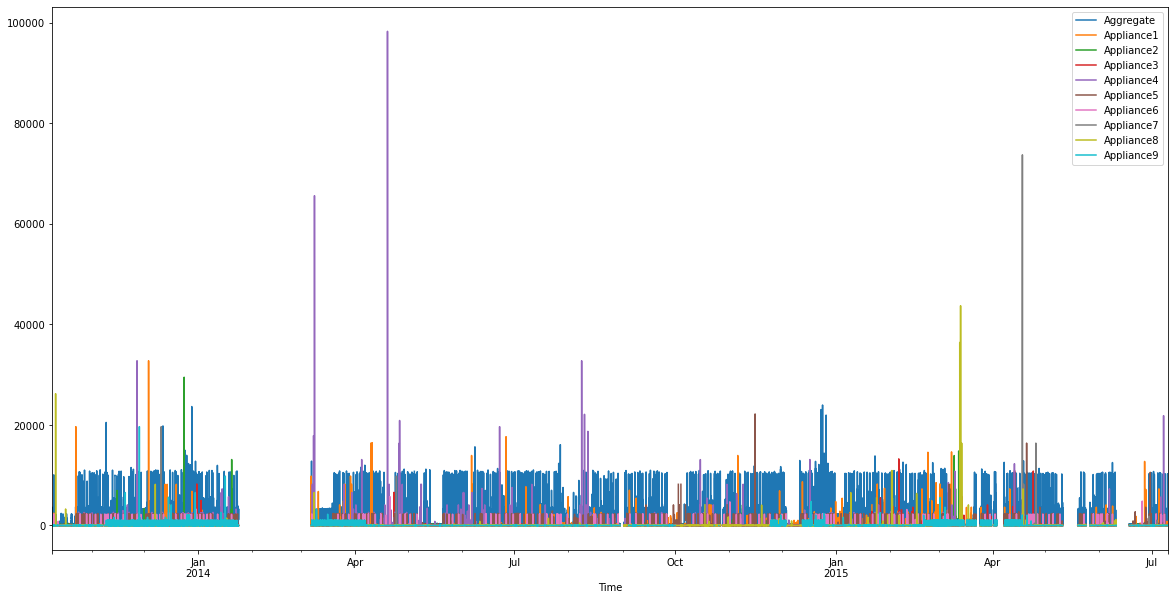

In [14]:
df_resample.plot(figsize=(20,10))
plt.show()

In [11]:
print("采用后点的数量:",len(df_resample))

采用后点的数量: 8518763


In [47]:
df_resample.describe()

,Aggregate,Appliance1,Appliance2,Appliance3,Appliance4,Appliance5,Appliance6,Appliance7,Appliance8,Appliance9
count,804898.000000,802385.000000,801517.000000,803446.000000,804034.000000,796496.000000,804063.000000,804910.000000,803261.000000,707063.000000
mean,477.708425,19.024078,16.789818,29.414760,5.164208,11.128937,11.231911,3.028483,6.303416,76.595823
std,761.419840,130.805845,51.045335,50.891763,364.023027,145.346826,153.969732,125.990238,88.539791,265.128454
min,113.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,186.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,245.777778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,448.857143,0.000000,45.277778,69.666667,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,23965.750000,65549.000000,29490.300000,13247.400000,98301.000000,22185.666667,5734.400000,73725.000000,43710.000000,19661.200000


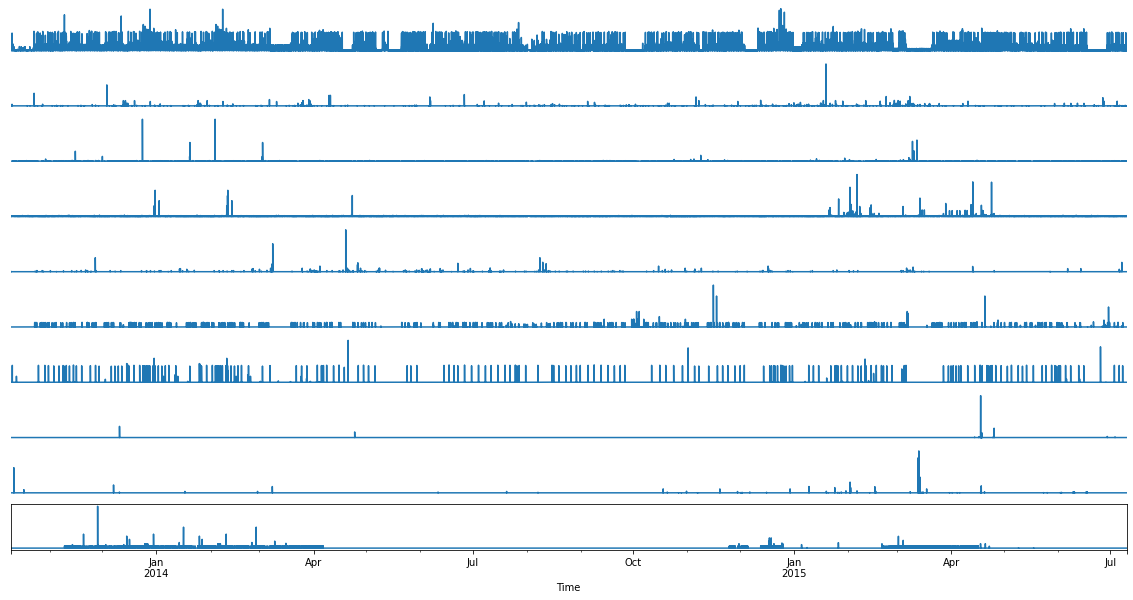

In [45]:
# 查看空值
plt.figure(figsize=(20,10))
for i in range(0,9): 
    plt.subplot(10,1,i+1)
    df_resample.iloc[:,i].plot()
    plt.xticks([])  # 去掉x轴
    plt.yticks([])  # 去掉y轴
    plt.axis('off')  # 去掉坐标轴
plt.subplot(10,1,10)
df_resample.iloc[:,9].plot()
plt.yticks([])  # 去掉y轴
# plt.axis('off')  # 去掉坐标轴
plt.show()

### 2.2 缺失值处理


In [62]:
date = df_resample.index
date[1].value - date[0].value

60000000000

In [ ]:
nan_index = df_resample["Aggregate"][df_resample["Aggregate"].isnull()].index # 缺失值的索引
nan_index[1].value - nan_index[0].value 

60000000000

In [35]:
def complete_missing_v3(df_resample):
    """
    采用缺失值填充方法进行：
    在本文中，采用了一种直接填充缺失值的方法，该方法利用了缺失值附近的数据进行填充。
    具体的做法是对每个时间序列进行遍历，当发现一段空缺值时，会寻找前一段等长完整数
    据是否足够填充缺失值。如果足够，则直接进行填充；如果不够，则先填充前面的部分，
    然后继续往后寻找一段完整的数据进行填充。这种方法可以保证数据在时间上的连续性，
    并最大化利用已知信息。
    """
    # 总表索引
    date = df_resample.index
    date_list = date.to_list()

    # 遍历每一条曲线
    for curve in ['Aggregate','Appliance1',	'Appliance2','Appliance3','Appliance4','Appliance5','Appliance6','Appliance7','Appliance8','Appliance9']:
        
        # 寻找空值
        nan_index = df_resample[curve][df_resample[curve].isnull()].index

        # 对空值采用前面对齐数据进行补齐
        # 遍历空值
        nan_date_i = 0
        while nan_date_i < len(nan_index):
            # 定位第一个空值
            j = date_list.index(nan_index[nan_date_i]) #第一个空值
            i = j-1
            k = j+1
            nan_date_i += 1 #判断下一个空点
            while (nan_date_i < len(nan_index)) and (nan_index[nan_date_i].value - nan_index[nan_date_i-1].value ==  date[1].value - date[0].value): #后一个点与前一个时间点相差12小时
                i -= 1 # 向前定位
                k += 1 # 向后定位
                nan_date_i += 1 # 继续判断下一个空点

                if i < 0: #当前面的不够补充时，取后面的点
                    # print("前面的不够补,先用前面的补充再找后面的")
                    df_resample.loc[:,curve].iloc[j:k-1] = df_resample[curve].iloc[i+1:j]

                    # 剩下的用后面的补全
                    i = date_list.index(nan_index[nan_date_i]) #第一个空值
                    j = i+2 #注：与前补充不一样,i 和 j 相反
                    k = j+(j-i) 
                    nan_date_i += 1 #判断下一个空点
                    while (nan_date_i < len(nan_index)) and (nan_index[nan_date_i].value - nan_index[nan_date_i-1].value ==  date[1].value - date[0].value): #后一个点与前一个时间点相差12小时
                        j += 1 # 空值段向后定位
                        k = j + (j-i) # 数据段向后定位
                        nan_date_i += 1 # 继续判断下一个空点
                    break
                
            if j > len(df_resample): #不够补充则报错,说明很多空白的，直接全部当成0
                print("数据缺失严重，直接置0")
                temp_df = df_resample[curve].copy()
                temp_df = np.zeros(len(df_resample))
                df_resample[curve] = temp_df
                # assert False ,"不够补充!!!\n请手动检查补充"
                
            # 补全
            df_resample.loc[:,curve].iloc[j:k] = df_resample[curve].iloc[i:j]
            
    return df_resample

def complete_missing(df_resample,patience=10):
    while len(df_resample)-len(df_resample.dropna()) != 0:
        df_resample = complete_missing_v3(df_resample)
        patience -= 1
        if patience == 0:
            assert False,"补全次数过多,请检查数据的正确性,或者增大参数patience的值"
    return df_resample
        

In [36]:
df_complete = complete_missing(df_resample)

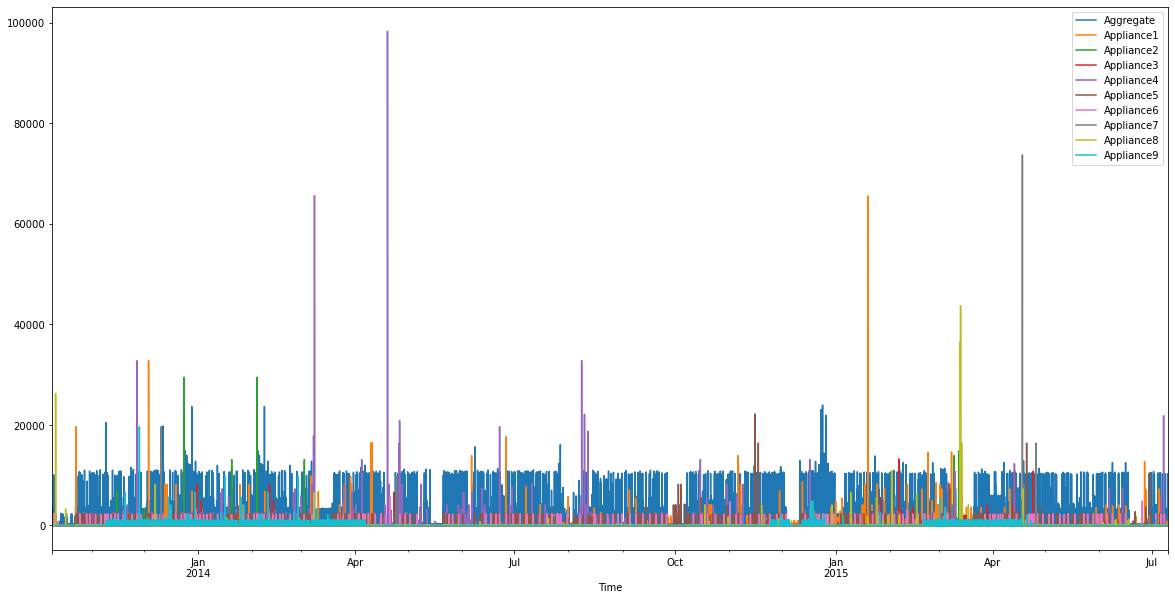

In [37]:
df_complete.plot(figsize=(20,10))
plt.show()

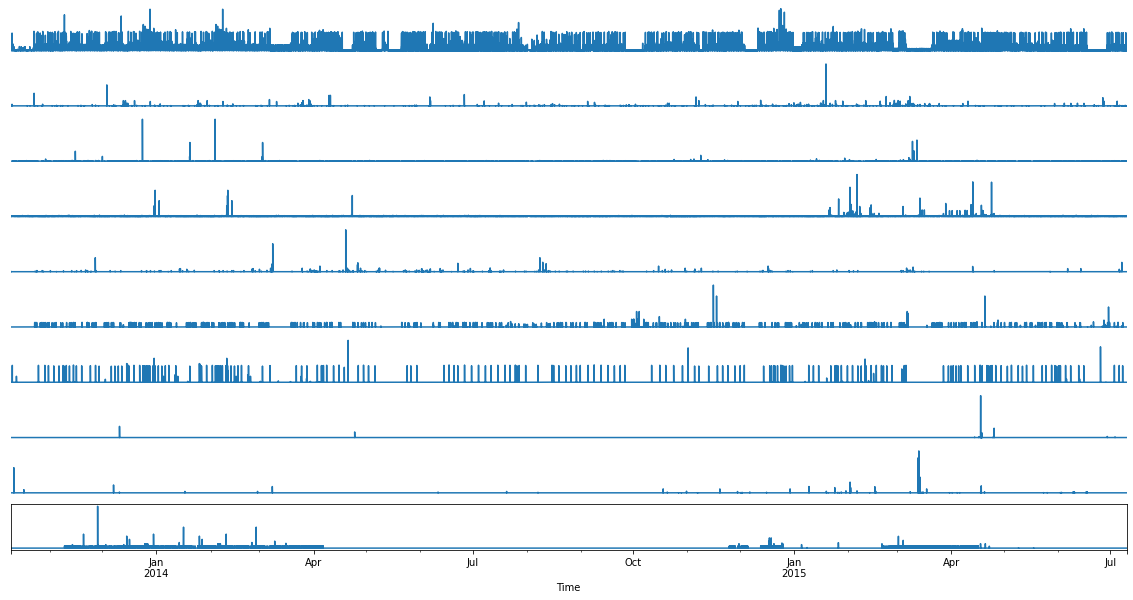

In [44]:
plt.figure(figsize=(20,10))
for i in range(0,9): 
    plt.subplot(10,1,i+1)
    df_complete.iloc[:,i].plot()
    plt.xticks([])  # 去掉x轴
    plt.yticks([])  # 去掉y轴
    plt.axis('off')  # 去掉坐标轴
plt.subplot(10,1,10)
df_complete.iloc[:,9].plot()
plt.yticks([])  # 去掉y轴
# plt.axis('off')  # 去掉坐标轴
plt.show()

In [39]:
# 如果是空值则保存
if len(df_complete)-len(df_complete.dropna()) == 0:
    df_resample.to_csv("REFIT_processed_missing/" + file_name + "_1T_processed.csv")
    print("保存成功：" + "REFIT_processed_missing/" + file_name + "_1T_processed.csv")

保存成功：REFIT_processed_missing/RAW_House1_Part_1T_processed.csv


### 2.3 异常值处理
1. 箱线图处理方法：四分位距(IQR)就是上四分位与下四分位的差值。而我们通过IQR的1.5倍为标准，规定：超过上四分位+1.5倍IQR距离，或者下四分位-1.5倍IQR距离的点为异常值
2. 均值上限处理方法：大于n倍均值的视为异常值。

#### 2.3.1 箱线图处理方法：

In [98]:
hi = 1
file_name = 'RAW_House{}_Part_1T_processed.csv'.format(hi)
save_name = 'RAW_House{}_1T_processed.csv'.format(hi)
df = pd.read_csv('REFIT_processed_missing/' + file_name ,parse_dates =["Time"], index_col ="Time")

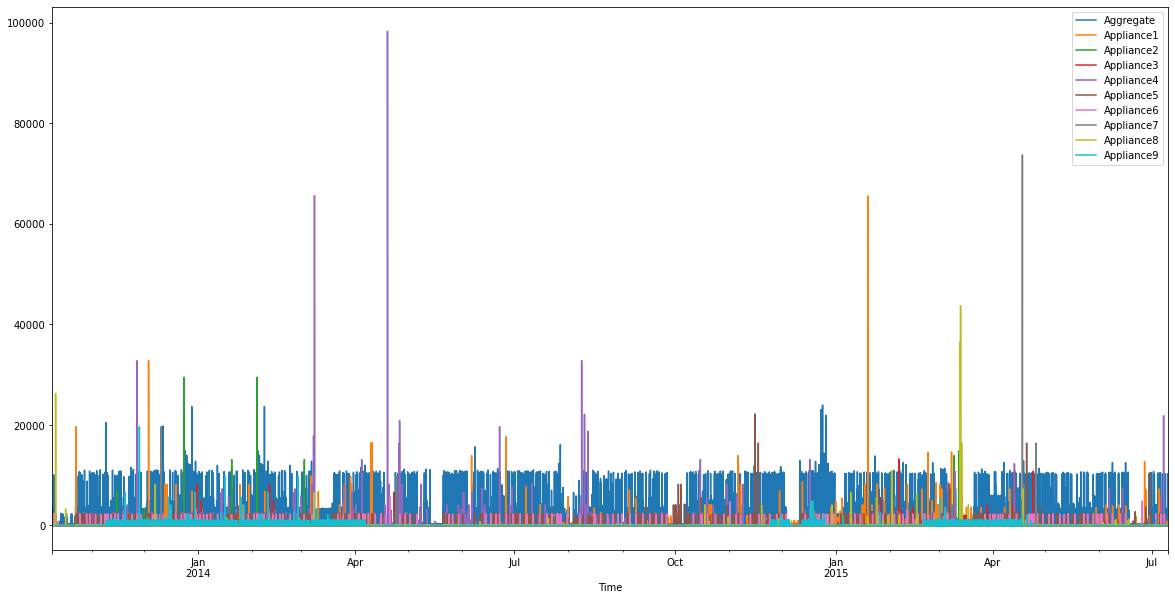

In [42]:
df.plot(figsize=(20,10))
plt.show()

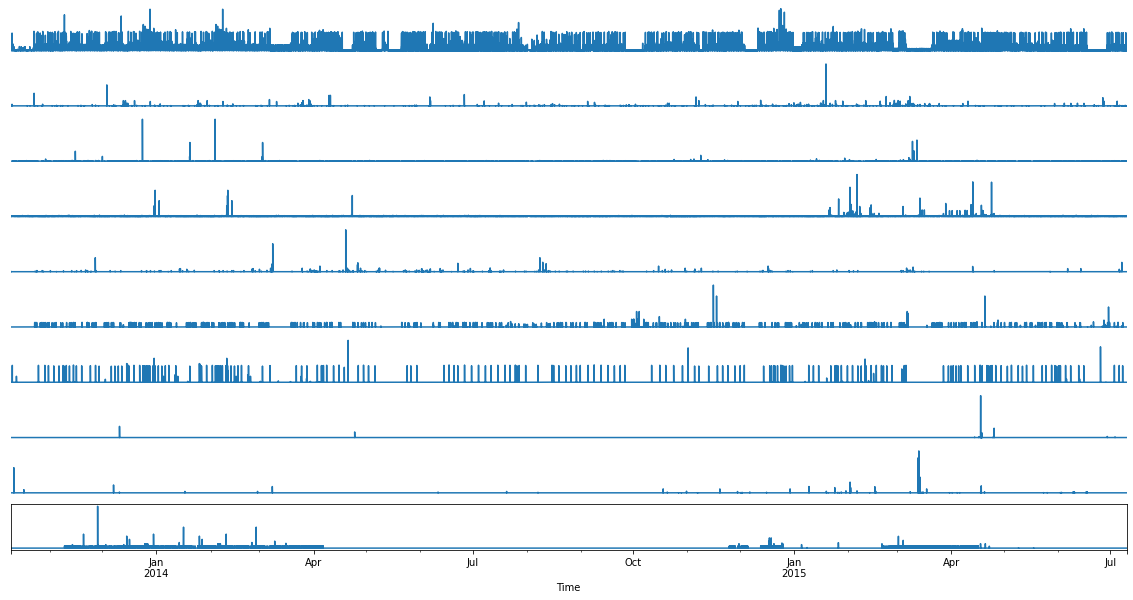

In [61]:
plt.figure(figsize=(20,10))
for i in range(0,9): 
    plt.subplot(10,1,i+1)
    df.iloc[:,i].plot()
    plt.xticks([])  # 去掉x轴
    plt.yticks([])  # 去掉y轴
    plt.axis('off')  # 去掉坐标轴
plt.subplot(10,1,10)
df.iloc[:,9].plot()
plt.yticks([])  # 去掉y轴
# plt.axis('off')  # 去掉坐标轴
plt.show()

In [49]:
# 处理奇异值，最单点特别高
df.describe()

,Aggregate,Appliance1,Appliance2,Appliance3,Appliance4,Appliance5,Appliance6,Appliance7,Appliance8,Appliance9
count,920031.000000,920031.000000,920031.000000,920031.000000,920031.000000,920031.000000,920031.000000,920031.000000,920031.000000,920031.000000
mean,497.336668,19.368281,16.672424,29.282260,4.928737,11.672710,11.801000,3.028772,6.336287,77.330228
std,773.657684,176.491007,59.096872,51.631337,342.136094,152.174785,157.862791,117.886320,83.236076,267.787725
min,113.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188.222222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,253.888889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,483.000000,0.000000,45.200000,69.600000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,23965.750000,65549.000000,29490.300000,13247.400000,98301.000000,22185.666667,5734.400000,73725.000000,43710.000000,19661.200000


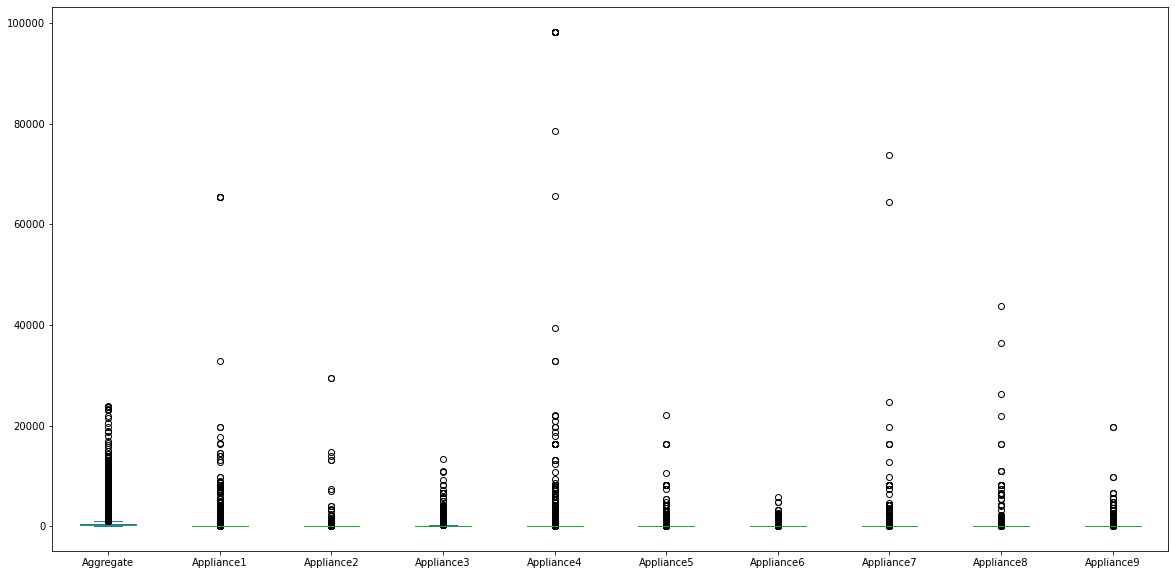

In [50]:
# 四分位分析
df.plot(kind='box',figsize=(20,10))
plt.show()

In [99]:
# 去除奇异值
for curve in ['Aggregate','Appliance1',	'Appliance2','Appliance3','Appliance4','Appliance5','Appliance6','Appliance7','Appliance8','Appliance9']:
    # 采用箱线图法去除
    df_sub = df[curve]
    top_quantile = df_sub.quantile(0.75)
    bottom_quantile = df_sub.quantile(0.25)
    df_sub[df_sub > top_quantile+(top_quantile-bottom_quantile)*1.5] = np.nan # 除去上离群点
    

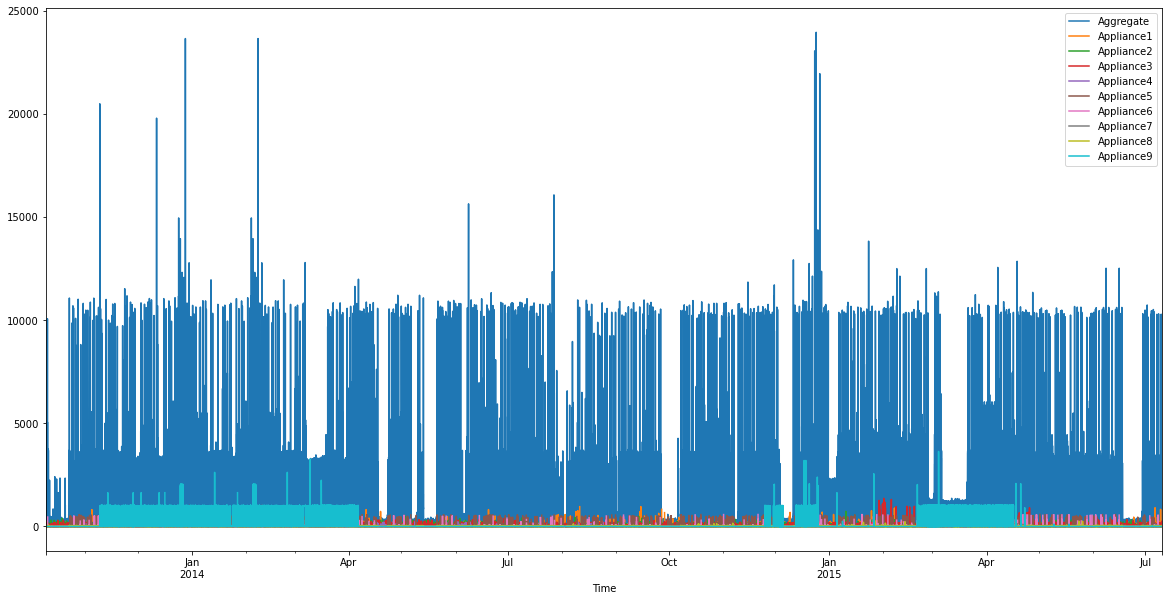

In [100]:
df.plot(figsize=(20,10))
plt.show()

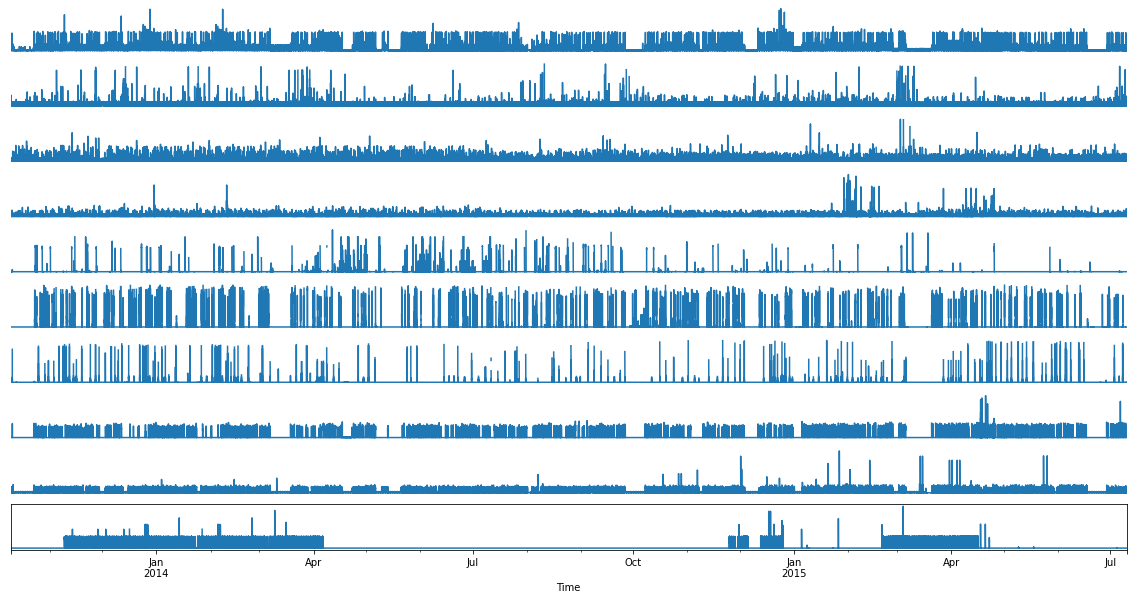

In [101]:
plt.figure(figsize=(20,10))
for i in range(0,9): 
    plt.subplot(10,1,i+1)
    df.iloc[:,i].plot()
    plt.xticks([])  # 去掉x轴
    plt.yticks([])  # 去掉y轴
    plt.axis('off')  # 去掉坐标轴
plt.subplot(10,1,10)
df.iloc[:,9].plot()
plt.yticks([])  # 去掉y轴
# plt.axis('off')  # 去掉坐标轴
plt.show()

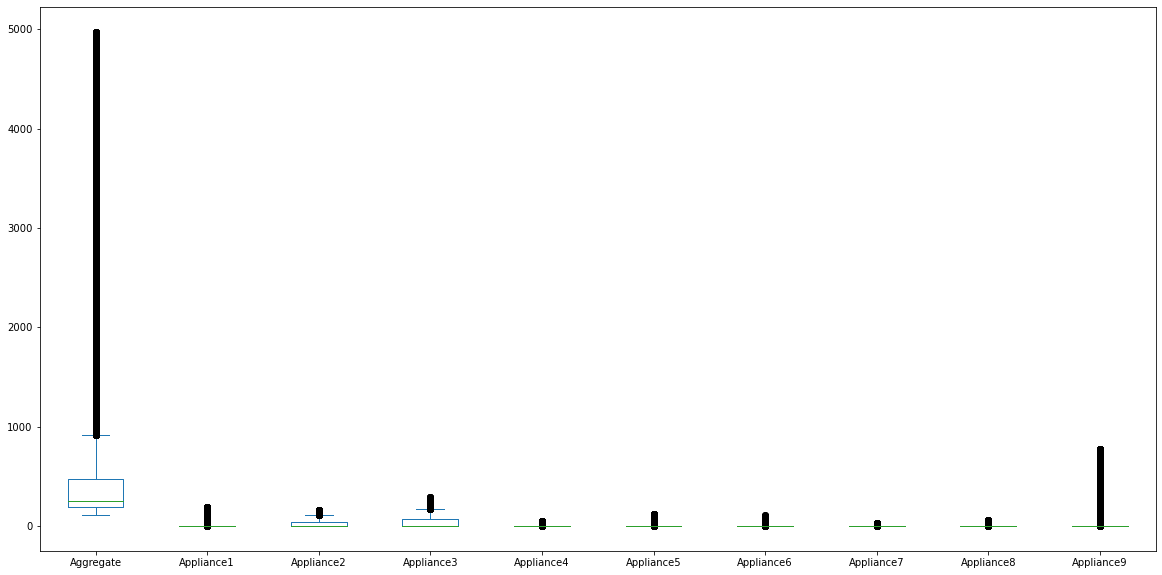

In [84]:
df.plot(kind='box',figsize=(20,10))
plt.show()

In [102]:
"有{:,d}条记录被去除了".format(len(df)-len(df.dropna()))

'有11,611条记录被去除了'

In [103]:
# 填充奇异值
for curve in ['Aggregate','Appliance1',	'Appliance2','Appliance3','Appliance4','Appliance5','Appliance6','Appliance7','Appliance8','Appliance9']:
    df_sub = df[curve]
    df_sub.fillna(df_sub.median(),inplace=True)

In [104]:
df.describe()

,Aggregate,Appliance1,Appliance2,Appliance3,Appliance4,Appliance5,Appliance6,Appliance7,Appliance8,Appliance9
count,920031.000000,920031.000000,920031.000000,920031.000000,920031.000000,920031.000000,920031.000000,920031.000000,920031.000000,920031.000000
mean,497.336668,17.359301,16.475327,29.064480,0.166320,2.189516,0.253700,2.492964,5.932592,77.202399
std,773.657684,32.622262,23.441299,36.442930,4.369573,22.873852,8.042398,8.197802,12.654269,265.197787
min,113.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188.222222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,253.888889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,483.000000,0.000000,45.200000,69.600000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,23965.750000,963.764706,825.888889,1365.333333,246.000000,583.444444,584.285714,141.333333,292.571429,3638.333333


In [ ]:
## 保存处理结果
df.to_csv("REFIT_processed/" + save_name)

#### 2.3.2 均值上限处理方法：

In [ ]:
hi = 1
file_name = 'RAW_House{}_Part_1T_processed.csv'.format(hi)
save_name = 'RAW_House{}_1T_processed.csv'.format(hi)
df = pd.read_csv('REFIT_processed_missing/' + file_name ,parse_dates =["Time"], index_col ="Time")

In [ ]:
# 去除奇异值
for curve in ['Aggregate','Appliance1',	'Appliance2','Appliance3','Appliance4','Appliance5','Appliance6','Appliance7','Appliance8','Appliance9']:
    ## 采用均值倍数处理，因为存在很多0箱线法去除会很多
    df_sub = df[curve]
    mean = df_sub.mean()
    df_sub[df_sub > 50*mean] = np.nan # 除去上离群点
    

In [ ]:
# 填充奇异值
for curve in ['Aggregate','Appliance1',	'Appliance2','Appliance3','Appliance4','Appliance5','Appliance6','Appliance7','Appliance8','Appliance9']:
    df_sub = df[curve]
    df_sub.fillna(df_sub.median(),inplace=True)

In [2]:
df.to_csv("REFIT_processed/" + save_name)

NameError: name 'df' is not defined